## 0. ИМПОРТ НЕОБХОДИМЫХ ФАЙЛОВ

In [1]:
import os
import sys
import warnings
import re

from datetime import timedelta

import tqdm

import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Первичная выгрузка данных по декларациям и сохранение в .csv (MCК)
df_numeric = pd.read_csv('df_numeric.csv')


## 1. ДАННЫЕ ДОМ РФ

### 1.1. ПЕРВИЧНЫЙ ПРОСМОТР

#### 1.1.1 ПЕРЕСОХРАНЕНИЕ В ФОРМАТЕ .csv

In [3]:
# Первичная выгрузка данных по декларациям и сохранение в .csv (MCК)
declaration_msk = pd.read_excel('declaration_dynamics_02102024.xlsx', sheet_name = 'Данные')
declaration_msk.to_csv('declaration_dynamics_02102024.csv', index=False)

In [4]:
# Выгрузка .csv (МСК)
declaration_msk = pd.read_csv('declaration_dynamics_02102024.csv')

C:\Users\HP\AppData\Local\Temp\ipykernel_1840\1858429624.py:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,24) have mixed types. Specify dtype option on import or set low_memory=False.
  declaration_msk = pd.read_csv('declaration_dynamics_02102024.csv')


In [5]:
display(declaration_msk.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202772 entries, 0 to 202771
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Дата выгрузки                 72898 non-null   object 
 1   ID ЖК                         72898 non-null   object 
 2   ЖК                            72898 non-null   object 
 3   Корпуса                       72898 non-null   object 
 4   Регион Город                  72898 non-null   object 
 5   Округ Направление             72898 non-null   object 
 6   Регион                        72898 non-null   object 
 7   Застройщик                    72898 non-null   object 
 8   Дата начала интервала         72898 non-null   object 
 9   Дата завершения интервала     72898 non-null   object 
 10  Длина интервала, мес.         72898 non-null   object 
 11  Интервал                      72898 non-null   object 
 12  Продано квартир (ед.)         72898 non-null

None

In [6]:
declaration_msk.describe()

,Продано квартир (ед.),Продано нежилых (ед.),Продано машиномест (ед.),Продано квартир (кв. м.),Продано нежилых (кв. м.),Продано машиномест (кв. м.),Продано квартир (руб.),Продано нежилых (руб.),Продано машиномест (руб.),Цена кв. м квартир (руб.),Цена кв. м нежилых (руб.),Цена кв. м машиномест (руб.)
count,72898.000000,72898.000000,72898.000000,72898.000000,72898.000000,72898.000000,7.289800e+04,7.289800e+04,7.289800e+04,7.289800e+04,7.289800e+04,7.289800e+04
mean,12.253340,2.233340,1.501276,660.916994,69.510124,25.035529,1.300772e+08,1.534759e+07,3.088371e+06,1.330158e+05,4.896443e+04,2.073767e+04
std,52.156714,24.085255,10.692234,2841.374521,724.839869,245.516004,1.238192e+09,5.910614e+08,4.433444e+07,1.698146e+05,1.195159e+05,1.083532e+05
min,-5048.000000,-154.000000,-222.000000,-56965.000000,-43279.000000,-14592.000000,-2.137145e+11,-1.080409e+11,-4.329964e+09,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000,0.000000,0.000000,91.000000,0.000000,0.000000,1.644266e+07,0.000000e+00,0.000000e+00,1.052750e+05,0.000000e+00,0.000000e+00
75%,11.000000,1.000000,0.000000,579.000000,5.000000,0.000000,1.232684e+08,4.741425e+05,0.000000e+00,2.089320e+05,5.001400e+04,0.000000e+00
max,4820.000000,5514.000000,643.000000,114862.000000,65379.000000,16701.000000,2.139734e+11,1.080409e+11,4.116435e+09,1.999501e+06,1.999944e+06,2.048597e+07


#### 1.1.2 ПРЕДОБРАБОТКА

In [7]:
# Просмотр столбцов таблицы для выбора интересующих
declaration_msk.columns

Index(['Дата выгрузки', 'ID ЖК', 'ЖК', 'Корпуса', 'Регион Город',
       'Округ Направление', 'Регион', 'Застройщик', 'Дата начала интервала',
       'Дата завершения интервала', 'Длина интервала, мес.', 'Интервал',
       'Продано квартир (ед.)', 'Продано нежилых (ед.)',
       'Продано машиномест (ед.)', 'Продано квартир (кв. м.)',
       'Продано нежилых (кв. м.)', 'Продано машиномест (кв. м.)',
       'Продано квартир (руб.)', 'Продано нежилых (руб.)',
       'Продано машиномест (руб.)', 'Цена кв. м квартир (руб.)',
       'Цена кв. м нежилых (руб.)', 'Цена кв. м машиномест (руб.)',
       'фильтр по числу квартир'],
      dtype='object')

In [8]:
test_declarations = declaration_msk.copy()

# Отбор необходимых столбцов
test_declarations = test_declarations[[
                                        'ЖК',
                                        'ID ЖК',
                                        'Корпуса',
                                        'Регион',
                                        'Застройщик',
                                        'Округ Направление',
                                        'Дата начала интервала',
                                        'Дата завершения интервала',
                                        'Продано квартир (кв. м.)',
                                        'Продано нежилых (кв. м.)',
                                        'Продано квартир (руб.)',
                                        'Продано нежилых (руб.)',
                                        'Цена кв. м квартир (руб.)'
                                        ]]

# Приведение столбца в формат дат
test_declarations['Дата завершения интервала'] = pd.to_datetime(test_declarations['Дата завершения интервала'])
test_declarations['Дата начала интервала'] = pd.to_datetime(test_declarations['Дата начала интервала'])

# Отбираем данные на конкретные даты
test_declarations = test_declarations[test_declarations['Дата завершения интервала'] > '2018-12-31']

In [9]:
test_declarations.head(10)

,ЖК,ID ЖК,Корпуса,Регион,Застройщик,Округ Направление,Дата начала интервала,Дата завершения интервала,Продано квартир (кв. м.),Продано нежилых (кв. м.),Продано квартир (руб.),Продано нежилых (руб.),Цена кв. м квартир (руб.)
0,31-й квартал (Пушкино),1281,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",Московская область,Профи Инвест,Ярославское шоссе,2019-07-31,2019-12-09,39.0,0.0,2420400.0,0.0,62062.0
1,31-й квартал (Пушкино),1281,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",Московская область,Профи Инвест,Ярославское шоссе,2019-12-09,2020-01-10,536.0,0.0,44480428.0,0.0,82986.0
2,31-й квартал (Пушкино),1281,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",Московская область,Профи Инвест,Ярославское шоссе,2020-01-10,2020-02-10,887.0,0.0,70075023.0,0.0,79002.0
3,31-й квартал (Пушкино),1281,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",Московская область,Профи Инвест,Ярославское шоссе,2020-02-10,2020-03-10,1233.0,0.0,98205167.0,0.0,79647.0
4,31-й квартал (Пушкино),1281,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",Московская область,Профи Инвест,Ярославское шоссе,2020-03-10,2020-04-09,1291.0,0.0,101148479.0,0.0,78349.0
5,31-й квартал (Пушкино),1281,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",Московская область,Профи Инвест,Ярославское шоссе,2020-04-09,2020-05-14,1602.0,0.0,128020072.0,0.0,79913.0
6,31-й квартал (Пушкино),1281,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",Московская область,Профи Инвест,Ярославское шоссе,2020-05-14,2020-06-10,671.0,0.0,56709452.0,0.0,84515.0
7,31-й квартал (Пушкино),1281,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",Московская область,Профи Инвест,Ярославское шоссе,2020-06-10,2020-07-10,1532.0,0.0,118095412.0,0.0,77086.0
8,31-й квартал (Пушкино),1281,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",Московская область,Профи Инвест,Ярославское шоссе,2020-07-10,2020-08-10,1752.0,38.0,143378219.0,1555200.0,81837.0
9,31-й квартал (Пушкино),1281,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",Московская область,Профи Инвест,Ярославское шоссе,2020-08-10,2020-09-09,3545.0,20.0,294598417.0,790400.0,83103.0


In [10]:
# Группировка и сортировка данных
msk_grouped1 = test_declarations[test_declarations['Регион'] == 'Москва'].sort_values(by='Продано квартир (кв. м.)')
new_msk_grouped1 = test_declarations[test_declarations['Регион'] == 'Новая Москва'].sort_values(by='Продано квартир (кв. м.)')
mo_grouped1 = test_declarations[test_declarations['Регион'] == 'Московская область'].sort_values(by='Продано квартир (кв. м.)')

#### 1.1.3 ПОСТРОЕНИЕ ГРАФИКОВ

In [11]:
# Построение боксплотов
def plot_boxplot(data, title, x_label, y_label, order=None):
    plt.figure(figsize=(14, 8))
    sns.boxplot(x='Округ Направление', y='Продано квартир (кв. м.)', data=data, palette='Blues', showfliers=False, order=order)
    plt.title(title, fontsize=20, pad=20)
    plt.xlabel(x_label, fontsize=14, labelpad=15)
    plt.ylabel(y_label, fontsize=16, labelpad=15)
    plt.xticks(rotation=90)
    plt.subplots_adjust(left=0.1, right=0.9, top=0.85, bottom=0.2)
    plt.tight_layout()
    plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_1840\2517735049.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Округ Направление', y='Продано квартир (кв. м.)', data=data, palette='Blues', showfliers=False, order=order)


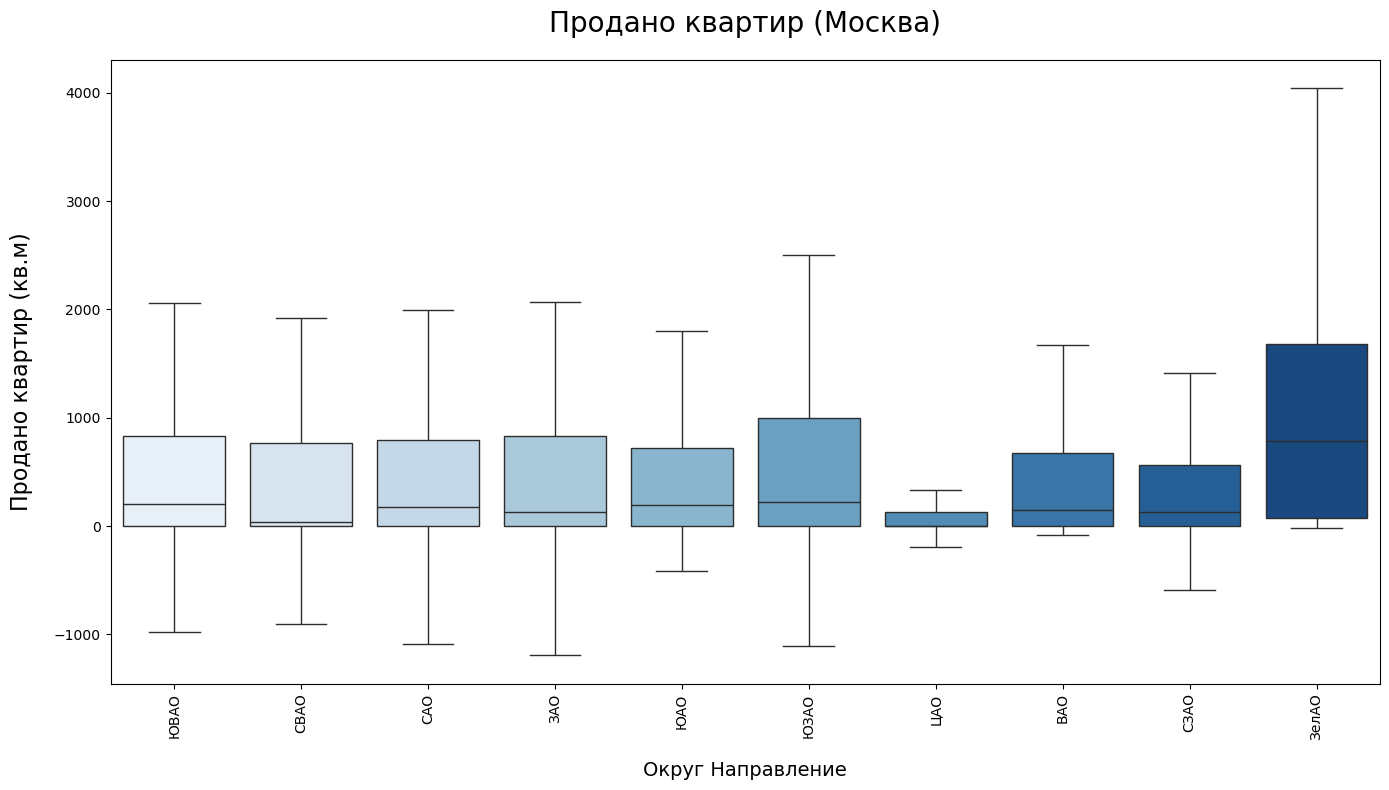

C:\Users\HP\AppData\Local\Temp\ipykernel_1840\2517735049.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Округ Направление', y='Продано квартир (кв. м.)', data=data, palette='Blues', showfliers=False, order=order)


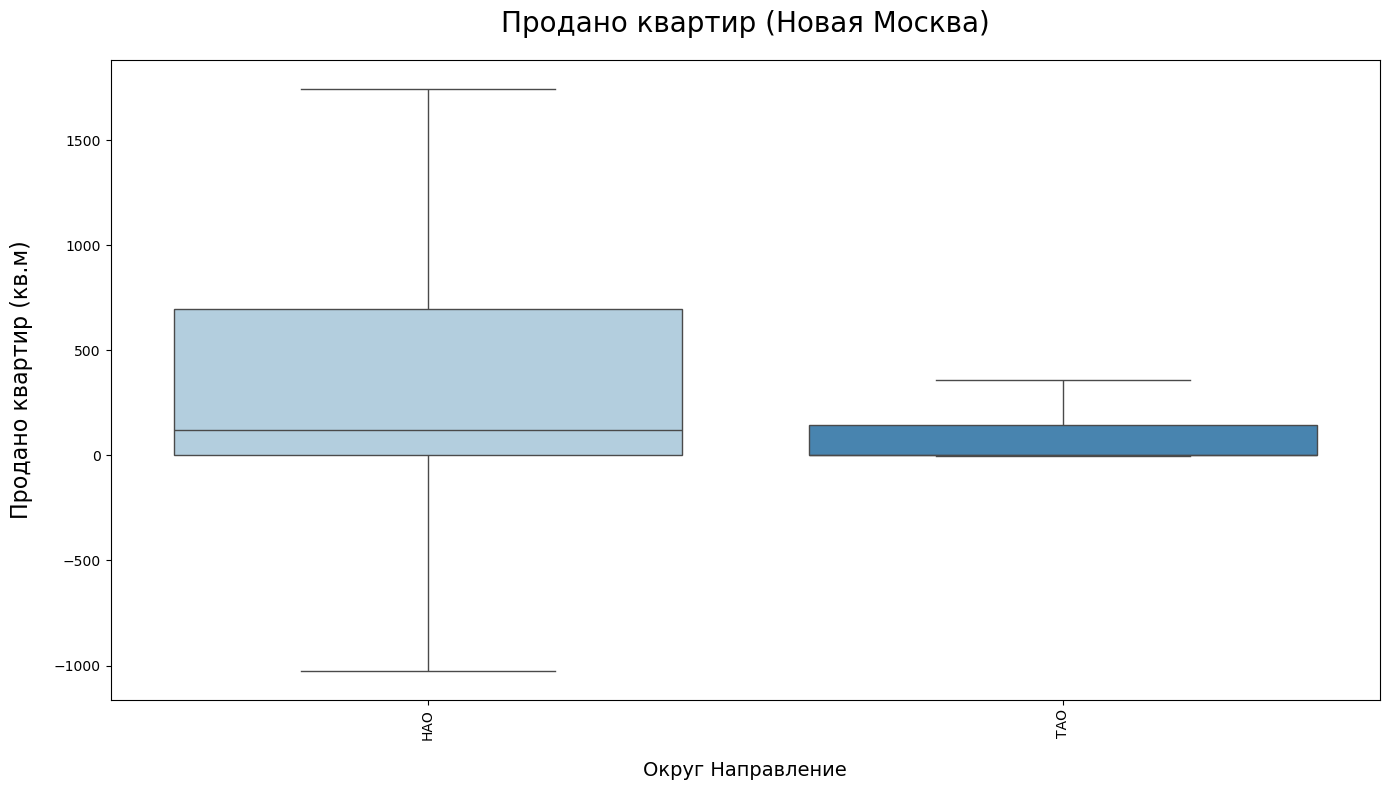

C:\Users\HP\AppData\Local\Temp\ipykernel_1840\2517735049.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Округ Направление', y='Продано квартир (кв. м.)', data=data, palette='Blues', showfliers=False, order=order)


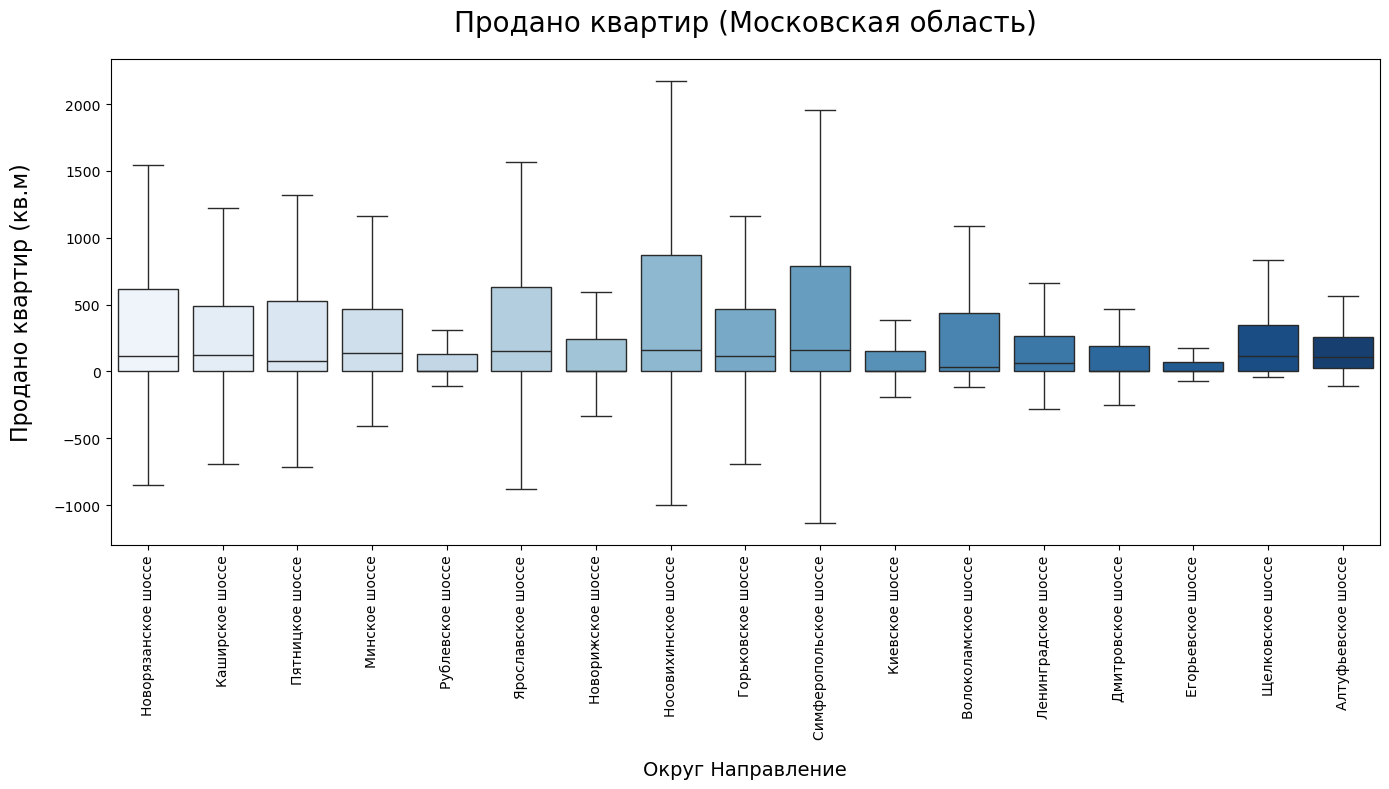

In [12]:
# Вывод графиков для разных регионов
plot_boxplot(msk_grouped1, 'Продано квартир (Москва)', 'Округ Направление', 'Продано квартир (кв.м)')
plot_boxplot(new_msk_grouped1, 'Продано квартир (Новая Москва)', 'Округ Направление', 'Продано квартир (кв.м)')
plot_boxplot(mo_grouped1, 'Продано квартир (Московская область)','Округ Направление', 'Продано квартир (кв.м)')

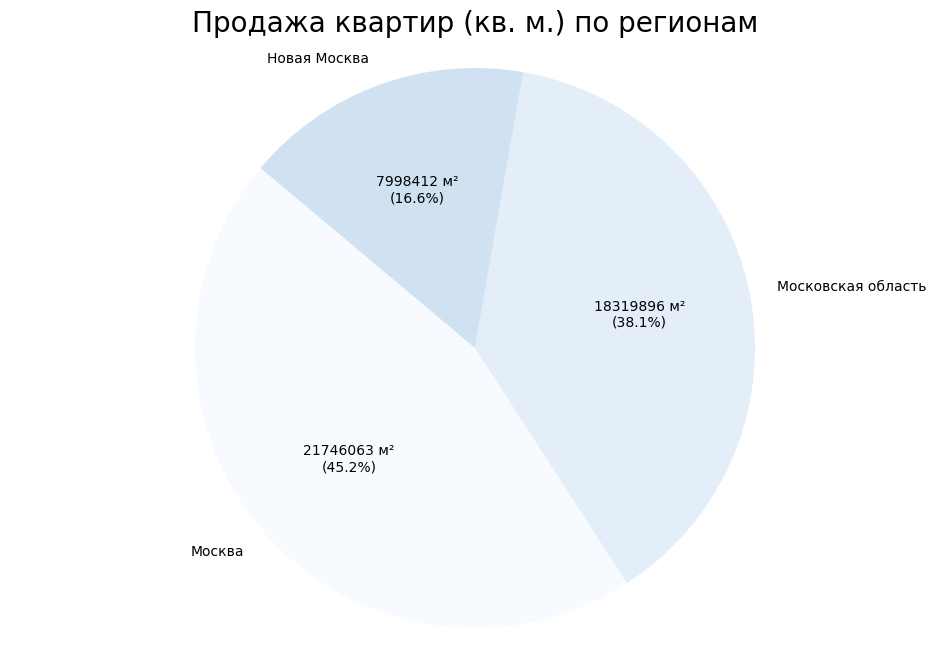

In [13]:
# Группировка данных по регионам и суммирование проданных квадратных метров
sales_by_region = test_declarations.groupby('Регион')['Продано квартир (кв. м.)'].sum()

# Настройка цветов для пайчарта
colors = plt.cm.Blues(range(0, 256, 25)) # Используем цветовую карту Blues

# Функция для отображения процентов и значений
def func(percentage, allvalues):
    absolute = int(percentage / 100. * sum(allvalues)) # Вычисляем абсолютное значение
    return f'{absolute} м²\n({percentage:.1f}%)'

# Создание пайчарта
plt.figure(figsize=(12, 8)) # Увеличьте размер графика
plt.pie(sales_by_region, labels=sales_by_region.index, colors=colors,
autopct=lambda pct: func(pct, sales_by_region), startangle=140)
plt.title('Продажа квартир (кв. м.) по регионам', fontsize =20)
plt.axis('equal') # Для равных осей (круглая форма)

# Сохранение графика в высоком качестве
plt.savefig('sales_by_region_pie_chart.png', dpi=300, bbox_inches='tight') # Сохранение в PNG с разрешением 300 DPI

# Отображение графика
plt.show()

### 1.2. БОЛЕЕ ДЕТАЛЬНЫЙ АНАЛИЗ

#### 1.2.1 ПРЕДОБРАБОТКА

In [14]:
# Группировка данных по застройщикам и суммирование проданных квадратных метров
top_developers = test_declarations.groupby('Застройщик')['Продано квартир (кв. м.)'].sum().nlargest(10)
top_projects = test_declarations.groupby('ЖК')['Продано квартир (кв. м.)'].sum().nlargest(10)

#### 1.2.2 ПОСТРОЕНИЕ ГРАФИКОВ 1

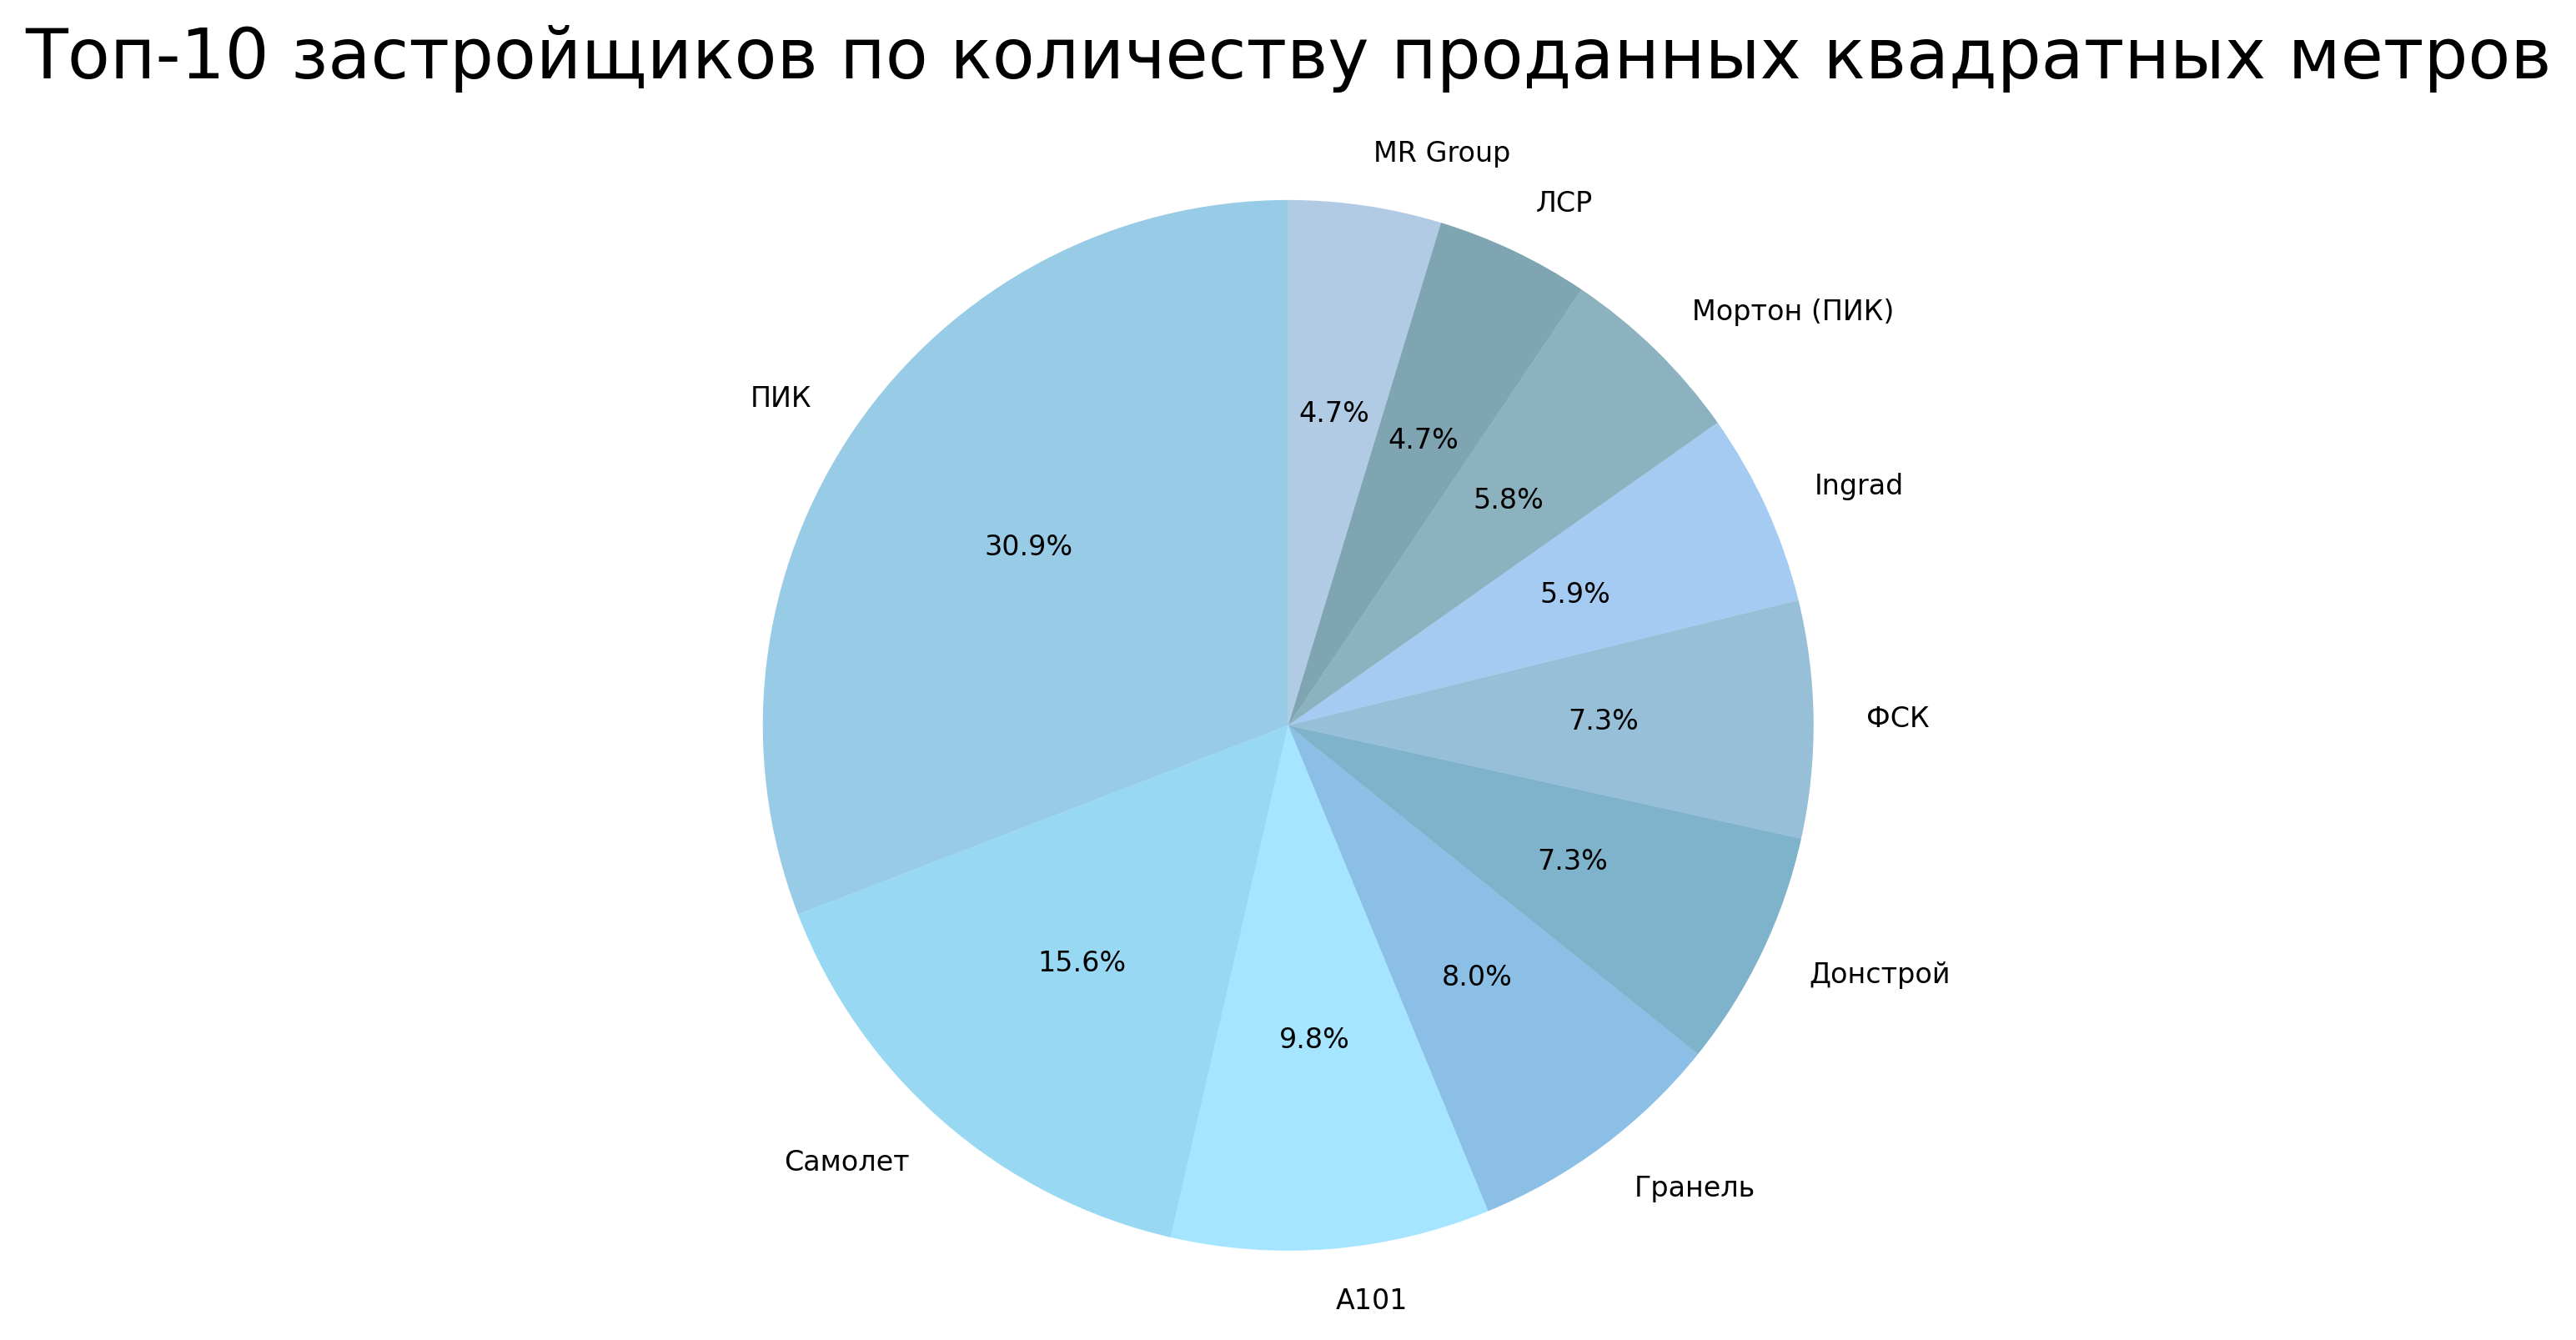

In [15]:
# Цвета в формате RGBA
colors = [
        (0.2, 0.6, 0.8, 0.5), # Прозрачный голубой
        (0.2, 0.7, 0.9, 0.5), # Более светлый прозрачный голубой
        (0.3, 0.8, 1.0, 0.5), # Светло-голубой
        (0.1, 0.5, 0.8, 0.5), # Темный прозрачный голубой
        (0.0, 0.4, 0.6, 0.5), # Умеренно прозрачный голубой
        (0.2, 0.5, 0.7, 0.5), # Умеренно темный прозрачный голубой
        (0.3, 0.6, 0.9, 0.5), # Яркий прозрачный голубой
        (0.1, 0.4, 0.5, 0.5), # Сероватый прозрачный голубой
        (0.0, 0.3, 0.4, 0.5), # Очень светлый прозрачный голубой
        (0.4, 0.6, 0.8, 0.5) # Темный прозрачный голубой
        ]

# Создание пайчарта
plt.figure(figsize=(10, 6), dpi=300) # Увеличение разрешения до 300 точек на дюйм
plt.pie(
        top_developers,
        labels=top_developers.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors[:len(top_developers)],
        textprops={'size': 8} # Уменьшаем размер цифр
        )
plt.title('Топ-10 застройщиков по количеству проданных квадратных метров', pad=20, fontsize=20) # Настройка заголовка
plt.axis('equal') # Чтобы круг был действительно кругом

# Сохранение графика в высоком качестве
plt.savefig('top1_developers_pie_chart.png', dpi=300, bbox_inches='tight') # Сохранение графика
plt.show()

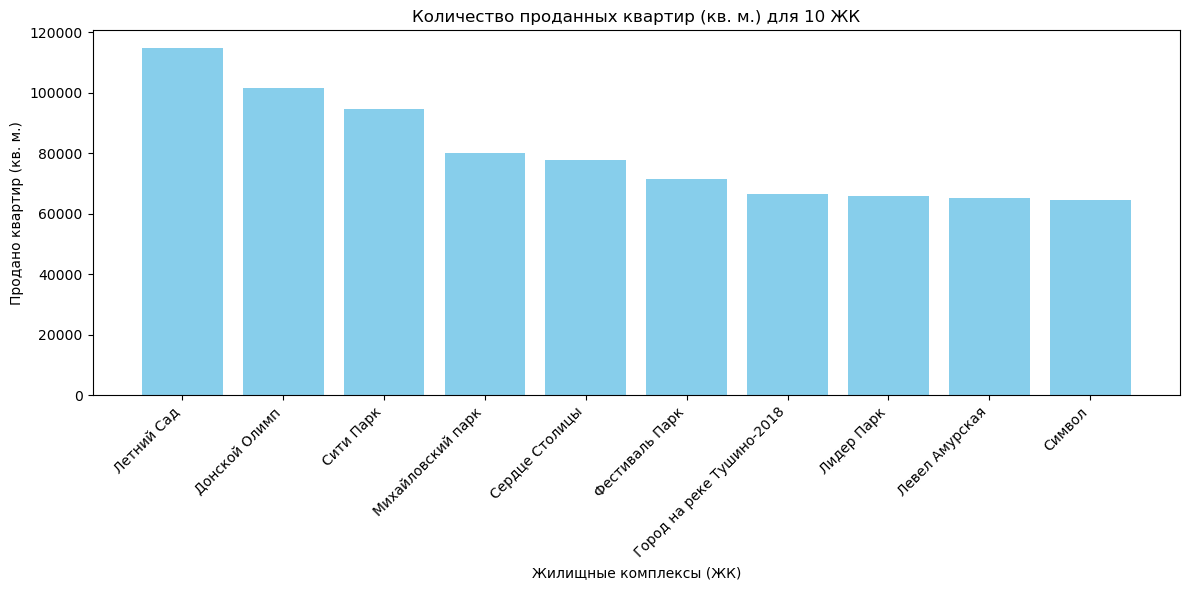

In [16]:
# Выбираем 10 ЖК с наибольшим количеством проданных квартир (кв. м.)
top_10_jk = test_declarations.nlargest(10, 'Продано квартир (кв. м.)')

# Строим график
plt.figure(figsize=(12, 6))
plt.bar(top_10_jk['ЖК'], top_10_jk['Продано квартир (кв. м.)'], color='skyblue')
plt.title('Количество проданных квартир (кв. м.) для 10 ЖК')
plt.xlabel('Жилищные комплексы (ЖК)')
plt.ylabel('Продано квартир (кв. м.)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### 1.2.3 ПОСТРОЕНИЕ ИНТЕРПОЛЯЦИИ

In [17]:
# Группируем по ЖК и рассчитываем сумму, а также количество уникальных корпусов
summary = test_declarations.groupby('ЖК').agg({
                                            'Продано квартир (кв. м.)': 'sum',
                                            'Корпуса': 'nunique' # Количество уникальных корпусов
                                            }).reset_index()

In [18]:
def interpolate_sales_by_month(test_declarations):
    results = []

    # Преобразуем столбцы с датами в формат datetime
    test_declarations['Дата начала интервала'] = pd.to_datetime(test_declarations['Дата начала интервала'])
    test_declarations['Дата завершения интервала'] = pd.to_datetime(test_declarations['Дата завершения интервала'])

    # Проходим по каждому ЖК
    for _, row in test_declarations.iterrows():
        start_date = row['Дата начала интервала']
        end_date = row['Дата завершения интервала']
        total_sales = row['Продано квартир (кв. м.)']
        name = row['ЖК']
        region = row['Регион']
        okrug = row['Округ Направление']
        developer = row['Застройщик']
        corpus = row['Корпуса']
        ID = row['ID ЖК']
        price = row['Цена кв. м квартир (руб.)']

        # Рассчитываем продажи за день
        total_days = (end_date - start_date).days + 1
        sales_per_day = total_sales / total_days if total_days > 0 else 0

        # Создаем список месяцев в интервале
        months = pd.date_range(start_date, end_date, freq='MS')

        # Если интервал в пределах одного месяца или меньше
        if len(months) == 0 or (start_date.year == end_date.year and start_date.month == end_date.month):
            results.append({
                'project': name,
                'year': start_date.year,
                'months': start_date.month,
                'sales_live': total_sales,
                'developer': developer,
                'region': region,
                'okrug': okrug,
                'corpus': corpus,
                'ID': ID,
                'price':price
            })
            continue

        # Обрабатываем каждый месяц
        for i, month_start in enumerate(months):
            # Определяем начало и конец периода для текущего месяца
            if i == 0:  # Первый месяц
                period_start = start_date
            else:
                period_start = month_start

            if i == len(months) - 1:  # Последний месяц
                period_end = end_date
            else:
                period_end = month_start + pd.offsets.MonthEnd(0)

            # Считаем дни и продажи за месяц
            days_in_period = (period_end - period_start).days + 1
            month_sales = sales_per_day * days_in_period

            results.append({
                'project': name,
                'year': period_start.year,
                'months': period_start.month,
                'sales_live': month_sales,
                'developer': developer,
                'region': region,
                'okrug': okrug,
                'corpus': corpus,
                'ID': ID,
                'price':price
            })

        # Обработка последнего месяца, если он не был включен в цикл
        if end_date > (months[-1] + pd.offsets.MonthEnd(0)):
            period_start = months[-1] + pd.offsets.MonthEnd(0) + pd.Timedelta(days=1)
            period_end = end_date
            days_in_period = (period_end - period_start).days + 1
            month_sales = sales_per_day * days_in_period

            results.append({
                'project': name,
                'year': period_start.year,
                'months': period_start.month,
                'sales_live': month_sales,
                'developer': developer,
                'region': region,
                'okrug': okrug,
                'corpus': corpus,
                'ID': ID,
                'price':price
            })

    # Создаем и группируем результирующий датафрейм
    result_df = pd.DataFrame(results)
    result_df = result_df.groupby(['project', 'year', 'months', 'developer', 'region', 'okrug', 'corpus', 'ID', 'price'])['sales_live'].sum().reset_index()

    # Сортируем результаты
    result_df = result_df.sort_values(['project', 'year', 'months'])
    return result_df

In [19]:
# Устанавливаем формат вывода чисел
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Применяем функцию интерполяции и выводим результат
result = interpolate_sales_by_month(test_declarations)
print(result)

                       project  year  months     developer  \
0       31-й квартал (Пушкино)  2019       7  Профи Инвест   
1       31-й квартал (Пушкино)  2019       9  Профи Инвест   
2       31-й квартал (Пушкино)  2019      10  Профи Инвест   
3       31-й квартал (Пушкино)  2019      11  Профи Инвест   
4       31-й квартал (Пушкино)  2019      12  Профи Инвест   
...                        ...   ...     ...           ...   
113122      Яуза Парк (Мытищи)  2024       8           ПИК   
113123      Яуза Парк (Мытищи)  2024       8           ПИК   
113124      Яуза Парк (Мытищи)  2024       8           ПИК   
113125      Яуза Парк (Мытищи)  2024       8           ПИК   
113126      Яуза Парк (Мытищи)  2024       8           ПИК   

                    region              okrug  \
0       Московская область  Ярославское шоссе   
1       Московская область  Ярославское шоссе   
2       Московская область  Ярославское шоссе   
3       Московская область  Ярославское шоссе   
4       Мо

In [20]:
df_grouped = result.copy()
df_grouped.head(10)

,project,year,months,developer,region,okrug,corpus,ID,price,sales_live
0,31-й квартал (Пушкино),2019,7,Профи Инвест,Московская область,Ярославское шоссе,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",1281,62062.000,9.455
1,31-й квартал (Пушкино),2019,9,Профи Инвест,Московская область,Ярославское шоссе,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",1281,62062.000,8.864
2,31-й квартал (Пушкино),2019,10,Профи Инвест,Московская область,Ярославское шоссе,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",1281,62062.000,9.159
3,31-й квартал (Пушкино),2019,11,Профи Инвест,Московская область,Ярославское шоссе,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",1281,62062.000,8.864
4,31-й квартал (Пушкино),2019,12,Профи Инвест,Московская область,Ярославское шоссе,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",1281,62062.000,2.659
5,31-й квартал (Пушкино),2019,12,Профи Инвест,Московская область,Ярославское шоссе,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",1281,82986.000,536.000
6,31-й квартал (Пушкино),2020,1,Профи Инвест,Московская область,Ярославское шоссе,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",1281,79002.000,887.000
7,31-й квартал (Пушкино),2020,2,Профи Инвест,Московская область,Ярославское шоссе,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",1281,79647.000,1233.000
8,31-й квартал (Пушкино),2020,3,Профи Инвест,Московская область,Ярославское шоссе,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",1281,78349.000,1291.000
9,31-й квартал (Пушкино),2020,4,Профи Инвест,Московская область,Ярославское шоссе,"очередь 2 корпус 1,очередь 2 корпус 2,очередь ...",1281,79913.000,1602.000


In [21]:
# Группировка обновленных данных
msk_grouped2 = df_grouped[df_grouped['region'] == 'Москва'].sort_values(by='sales_live')
new_msk_grouped2 = df_grouped[df_grouped['region'] == 'Новая Москва'].sort_values(by='sales_live')
mo_grouped2 = df_grouped[df_grouped['region'] == 'Московская область'].sort_values(by='sales_live')

#### 1.2.4 ПОСТРОЕНИЕ ГРАФИКОВ 2

In [22]:
# Построение боксплотов
def plot_boxplot2(data, title, x_label, y_label, order=None):
    plt.figure(figsize=(14, 8))
    sns.boxplot(x='okrug', y='sales_live', data=data, palette='Blues', showfliers=False, order=order)
    plt.title(title, fontsize=20, pad=20)
    plt.xlabel(x_label, fontsize=14, labelpad=15)
    plt.ylabel(y_label, fontsize=16, labelpad=15)
    plt.xticks(rotation=90)
    plt.subplots_adjust(left=0.1, right=0.9, top=0.85, bottom=0.2)
    plt.tight_layout()
    plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_1840\2792461008.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='okrug', y='sales_live', data=data, palette='Blues', showfliers=False, order=order)


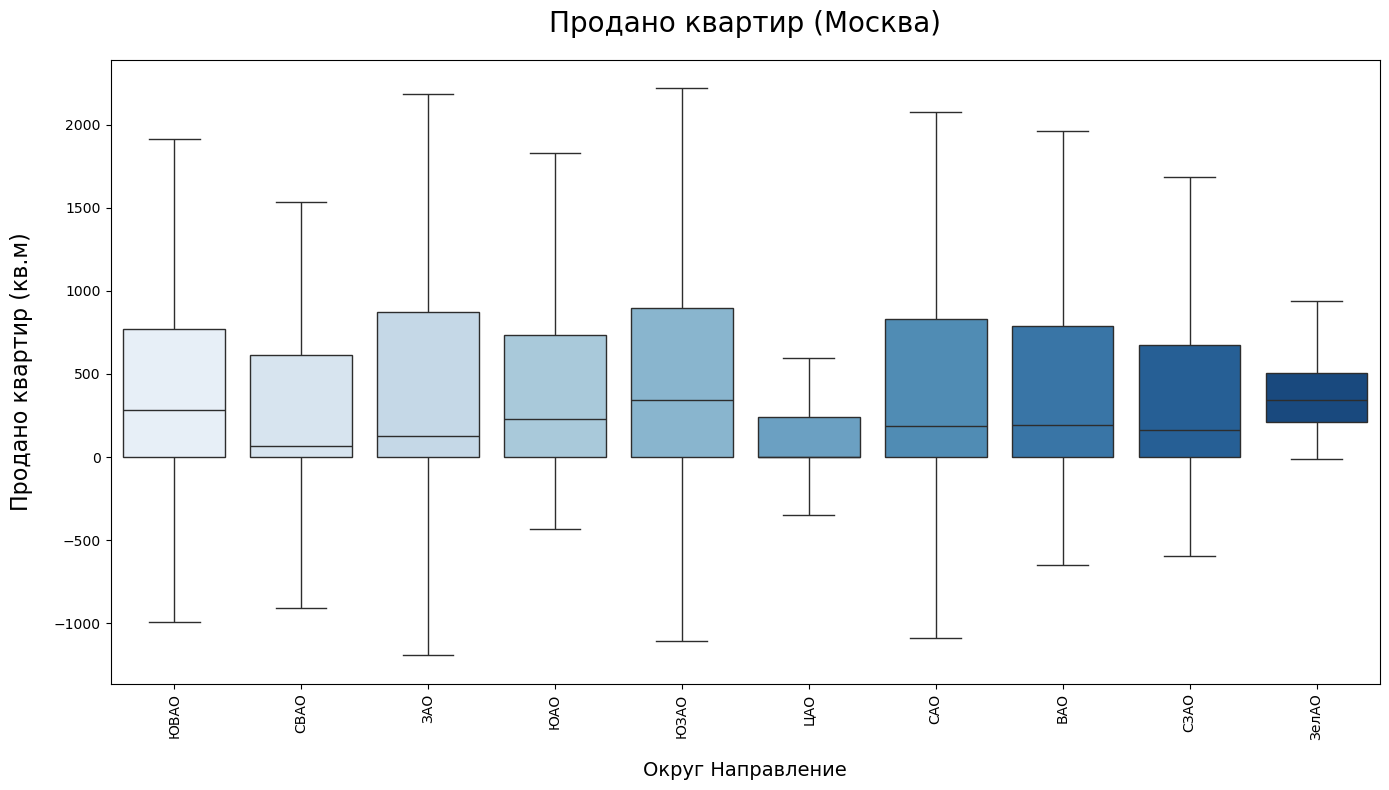

C:\Users\HP\AppData\Local\Temp\ipykernel_1840\2792461008.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='okrug', y='sales_live', data=data, palette='Blues', showfliers=False, order=order)


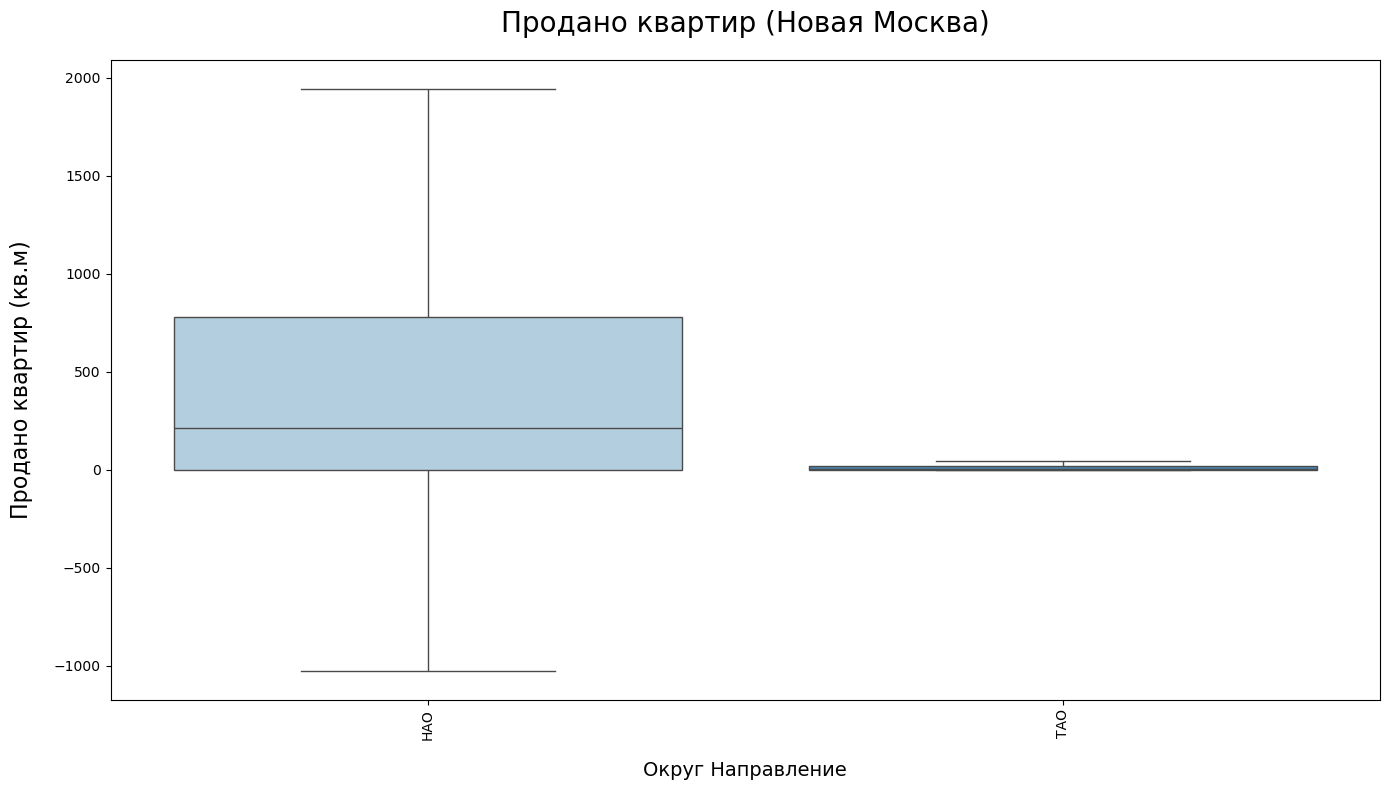

C:\Users\HP\AppData\Local\Temp\ipykernel_1840\2792461008.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='okrug', y='sales_live', data=data, palette='Blues', showfliers=False, order=order)


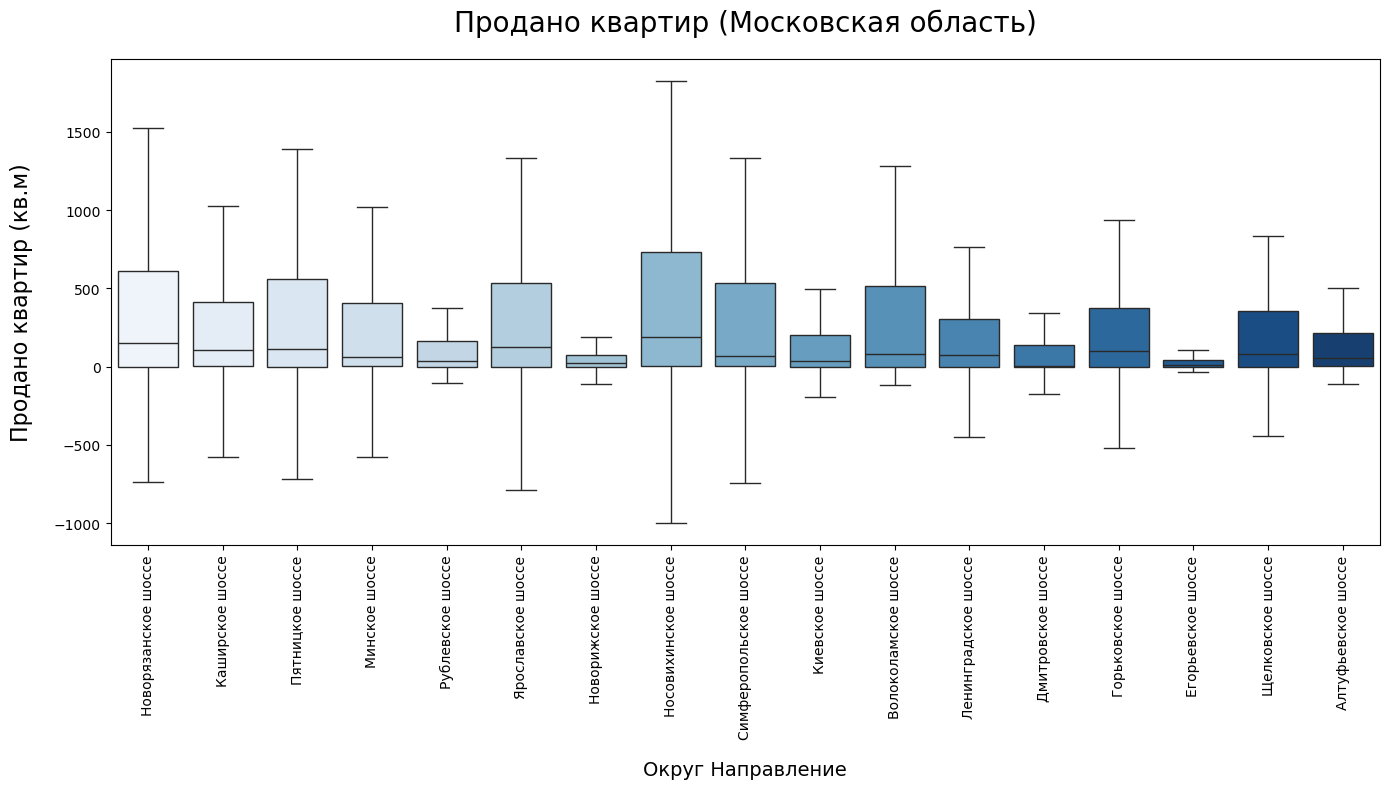

In [23]:
# Вывод графиков для разных регионов
plot_boxplot2(msk_grouped2, 'Продано квартир (Москва)', 'Округ Направление', 'Продано квартир (кв.м)')
plot_boxplot2(new_msk_grouped2, 'Продано квартир (Новая Москва)','Округ Направление', 'Продано квартир (кв.м)')
plot_boxplot2(mo_grouped2, 'Продано квартир (Московская область)', 'Округ Направление', 'Продано квартир (кв.м)')

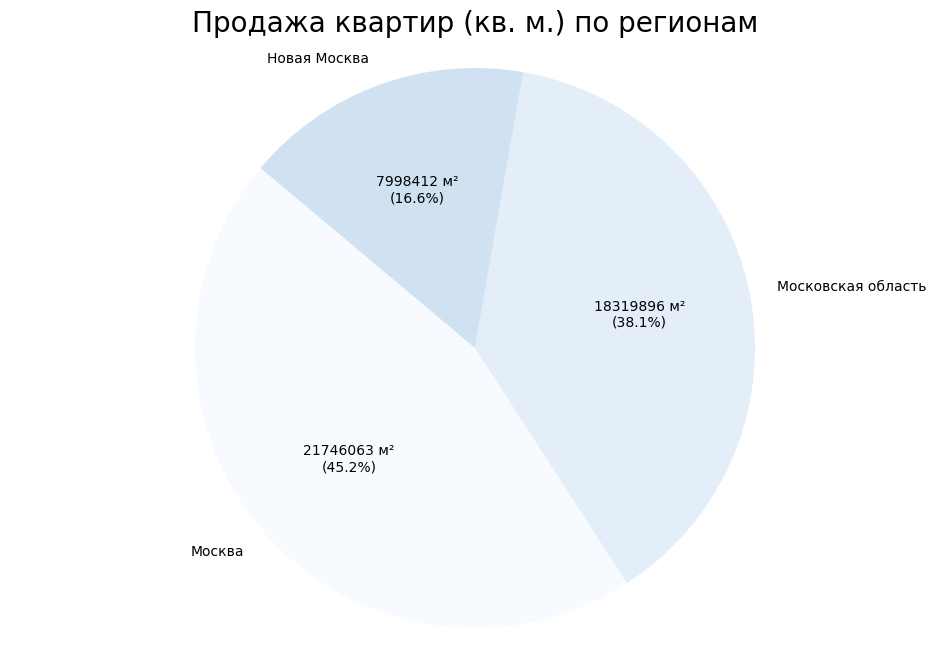

In [24]:
# Группировка данных по регионам и суммирование проданных квадратных метров
sales_by_region2 = df_grouped.groupby('region')['sales_live'].sum()

# Настройка цветов для пайчарта
colors = plt.cm.Blues(range(0, 256, 25)) # Используем цветовую карту Blues

# Функция для отображения процентов и значений
def func(percentage, allvalues):
    absolute = int(percentage / 100. * sum(allvalues)) # Вычисляем абсолютное значение
    return f'{absolute} м²\n({percentage:.1f}%)'

# Создание пайчарта
plt.figure(figsize=(12, 8)) # Увеличьте размер графика
plt.pie(sales_by_region2, labels=sales_by_region2.index, colors=colors,
autopct=lambda pct: func(pct, sales_by_region2), startangle=140)
plt.title('Продажа квартир (кв. м.) по регионам', fontsize =20)
plt.axis('equal') # Для равных осей (круглая форма)

# Сохранение графика в высоком качестве
plt.savefig('sales_by_region_pie_chart.png', dpi=300, bbox_inches='tight') # Сохранение в PNG с разрешением 300 DPI

# Отображение графика
plt.show()

#### 1.2.5 РАСЧЁТЫ

In [25]:
# Группировка данных по застройщикам и суммирование проданных квадратных метров
top_developers2 =df_grouped.groupby('developer')['sales_live'].sum().nlargest(10)
top_projects = df_grouped.groupby('project')['sales_live'].sum().nlargest(10)

#### 1.2.6 ПОСТРОЕНИЕ ГРАФИКОВ 3

(-1.099999349235515,
 1.0999999688808946,
 -1.0999999471387698,
 1.0999999974827985)

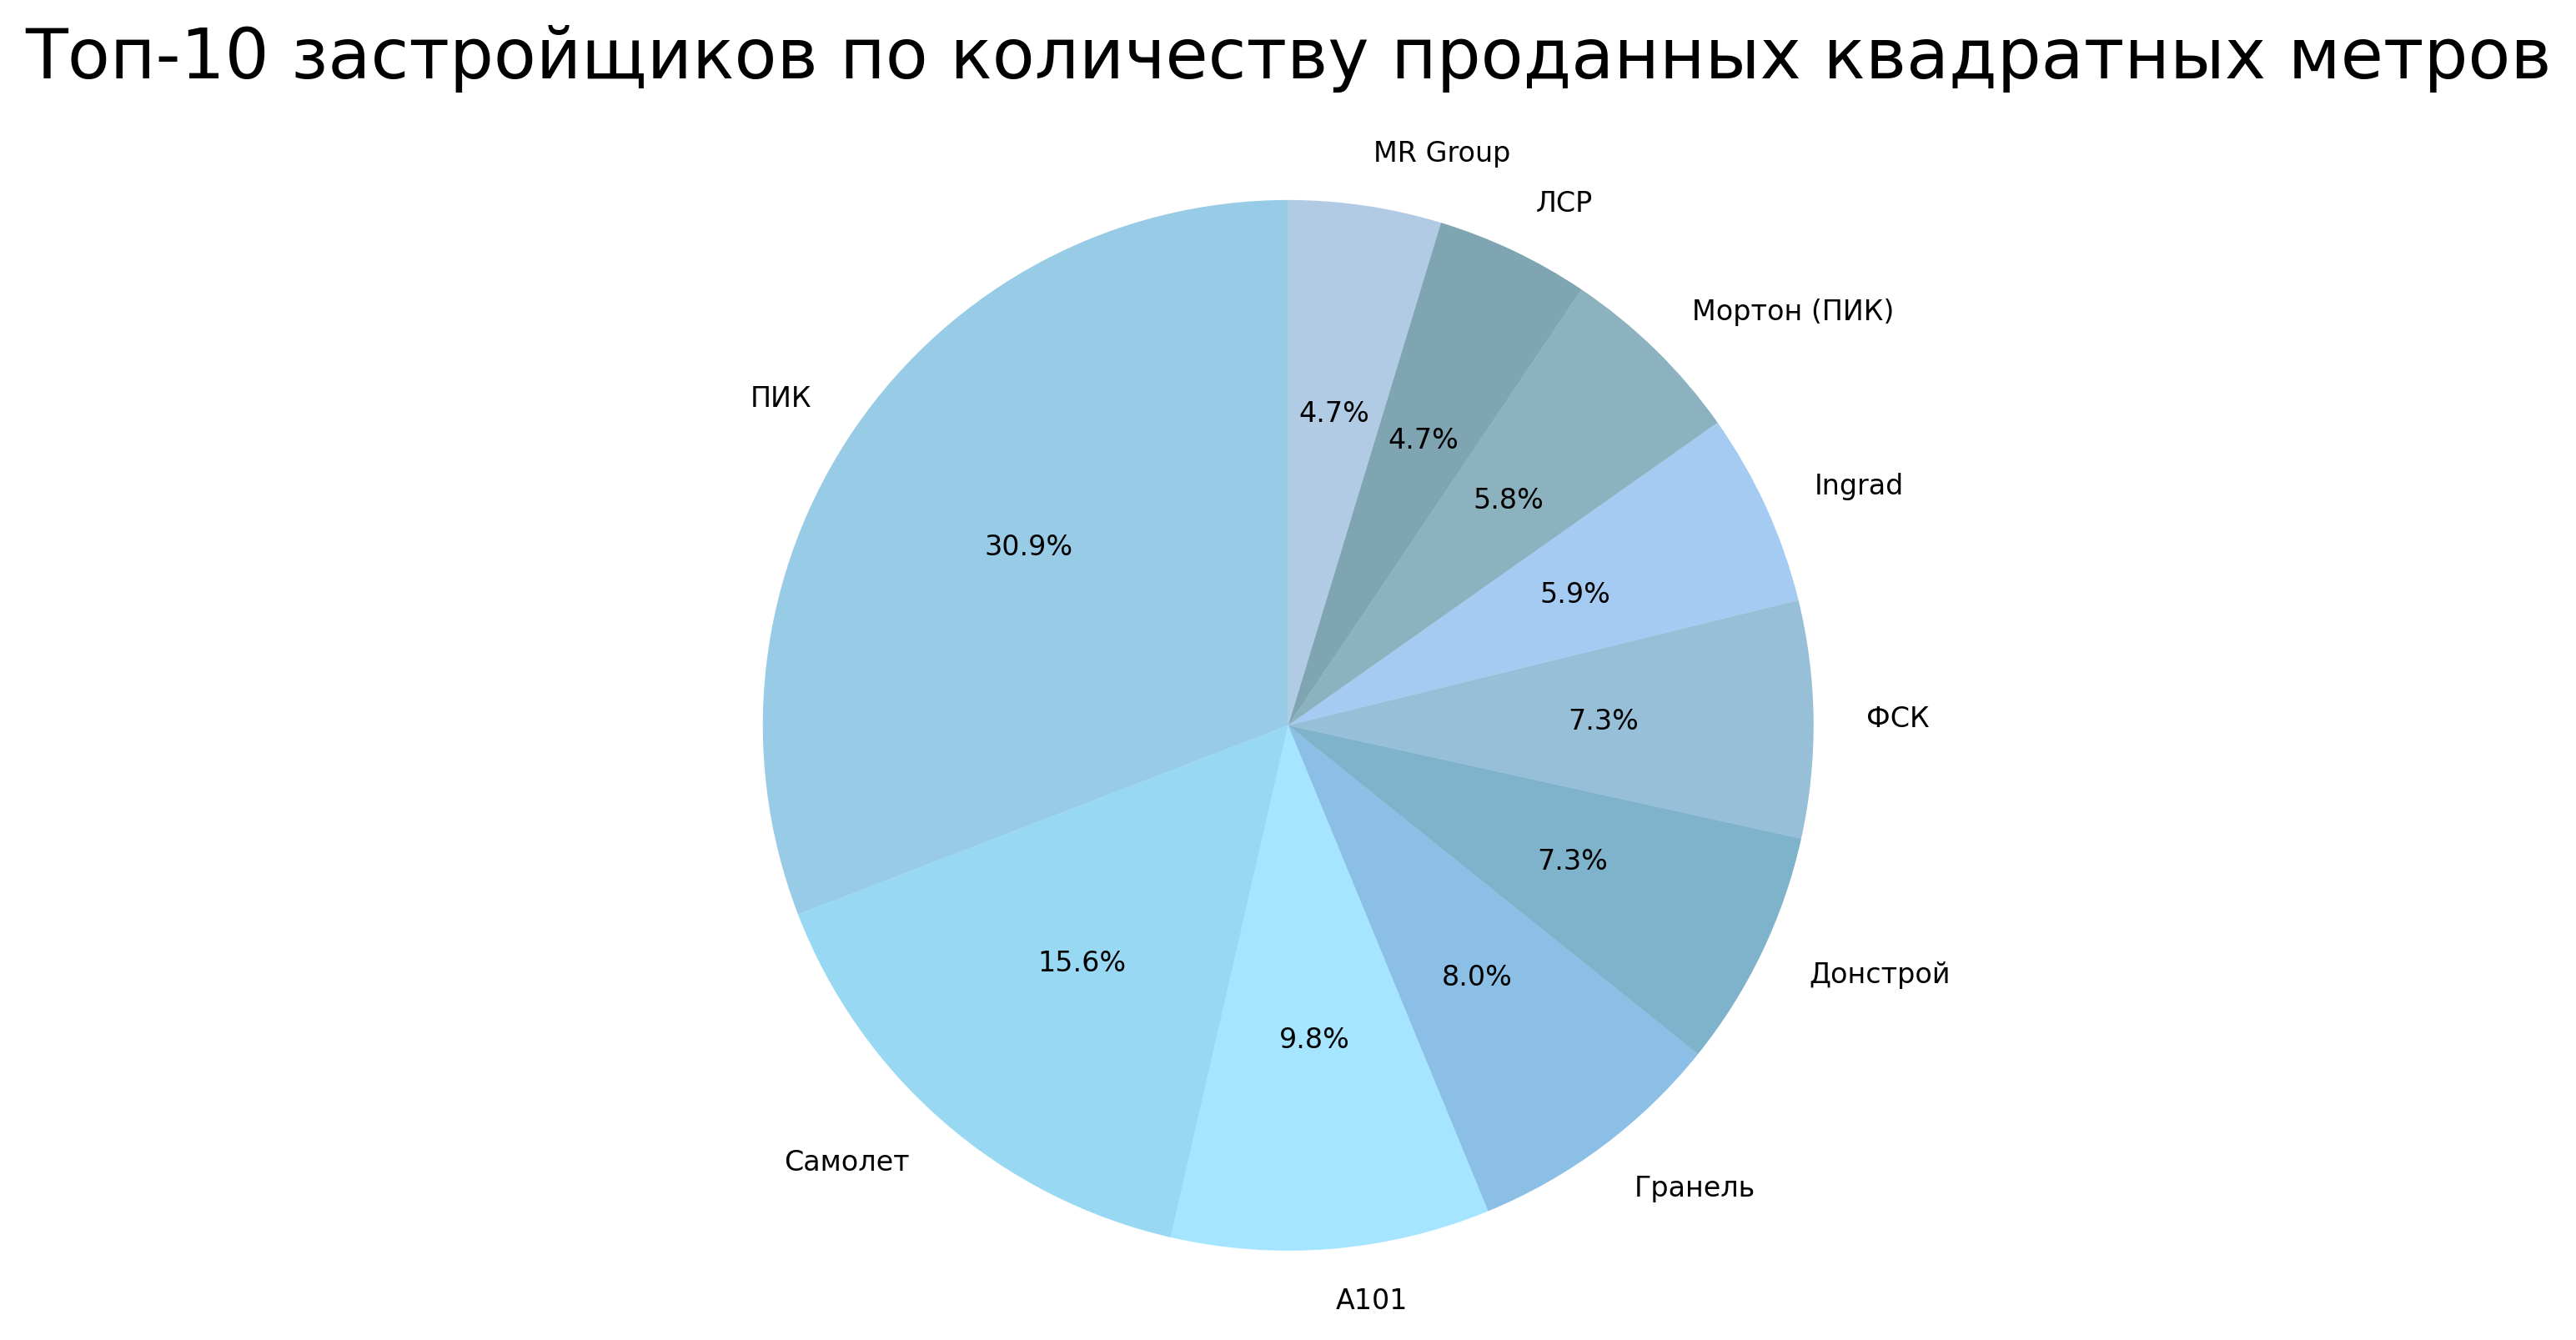

In [26]:
# Цвета в формате RGBA
colors = [
        (0.2, 0.6, 0.8, 0.5), # Прозрачный голубой
        (0.2, 0.7, 0.9, 0.5), # Более светлый прозрачный голубой
        (0.3, 0.8, 1.0, 0.5), # Светло-голубой
        (0.1, 0.5, 0.8, 0.5), # Темный прозрачный голубой
        (0.0, 0.4, 0.6, 0.5), # Умеренно прозрачный голубой
        (0.2, 0.5, 0.7, 0.5), # Умеренно темный прозрачный голубой
        (0.3, 0.6, 0.9, 0.5), # Яркий прозрачный голубой
        (0.1, 0.4, 0.5, 0.5), # Сероватый прозрачный голубой
        (0.0, 0.3, 0.4, 0.5), # Очень светлый прозрачный голубой
        (0.4, 0.6, 0.8, 0.5) # Темный прозрачный голубой
        ]

# Создание пайчарта
plt.figure(figsize=(10, 6), dpi=300) # Увеличение разрешения до 300 точек на дюйм
plt.pie(
        top_developers2,
        labels=top_developers2.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors[:len(top_developers2)],
        textprops={'size': 8} # Уменьшаем размер цифр
        )
plt.title('Топ-10 застройщиков по количеству проданных квадратных метров', pad=20, fontsize=20) # Настройка заголовка
plt.axis('equal') # Чтобы круг был действительно кругом

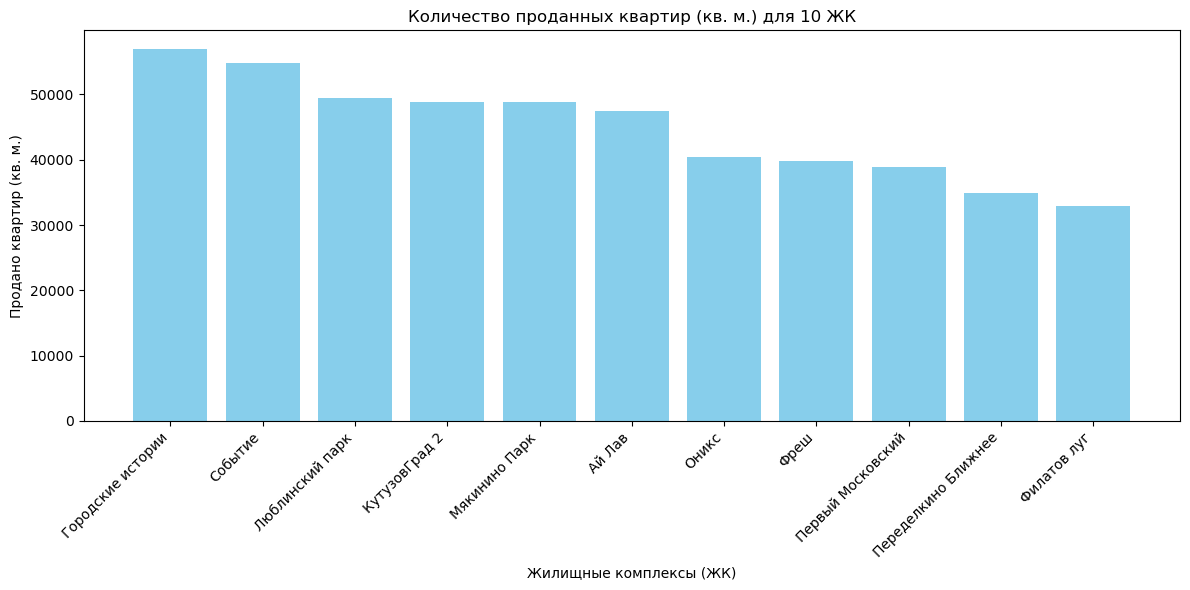

In [27]:
# Выбираем 10 ЖК с наибольшим количеством проданных квартир (кв. м.)
top_10_jk2 = df_grouped.nlargest(15, 'sales_live')

# Строим график
plt.figure(figsize=(12, 6))
plt.bar(top_10_jk2['project'], top_10_jk2['sales_live'], color='skyblue')
plt.title('Количество проданных квартир (кв. м.) для 10 ЖК')
plt.xlabel('Жилищные комплексы (ЖК)')
plt.ylabel('Продано квартир (кв. м.)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [28]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113127 entries, 0 to 113126
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   project     113127 non-null  object 
 1   year        113127 non-null  int64  
 2   months      113127 non-null  int64  
 3   developer   113127 non-null  object 
 4   region      113127 non-null  object 
 5   okrug       113127 non-null  object 
 6   corpus      113127 non-null  object 
 7   ID          113127 non-null  object 
 8   price       113127 non-null  float64
 9   sales_live  113127 non-null  float64
dtypes: float64(2), int64(2), object(6)
memory usage: 8.6+ MB


In [29]:
# Создаем копию датафрейма
df_numeric = df_grouped.copy()

# Преобразуем datetime колонки в timestamp
datetime_columns = df_numeric.select_dtypes(include=['datetime64[ns]']).columns
for col in datetime_columns:
    df_numeric[col] = df_numeric[col].astype(np.int64) // 10**9

# Создаем dummy-переменные для категориальных колонок
categorical_columns = df_numeric.select_dtypes(include=['object']).columns
df_numeric = pd.get_dummies(df_numeric, columns=categorical_columns, dummy_na=True)

# Проверяем результат
print(df_numeric.dtypes.value_counts())

bool       3806
int64         2
float64       2
Name: count, dtype: int64


In [30]:
df_numeric.to_csv('df_numeric.csv', index=False)

In [31]:
!pip install catboost

!pip install optuna

In [32]:
!pip install optuna

In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor

In [34]:


# Импортируем CatBoost с обработкой возможной ошибки
try:
    from catboost import CatBoostRegressor
except ValueError as e:
    print(f"CatBoost import error: {e}")
    print("Trying to fix by reinstalling numpy and catboost...")
    !pip uninstall -y numpy catboost
    !pip install numpy catboost --no-cache-dir
    from catboost import CatBoostRegressor

import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer
import optuna
from optuna.samplers import TPESampler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Отключаем предупреждения
warnings.filterwarnings('ignore')

# Проверяем версии ключевых пакетов
print(f"NumPy version: {np.__version__}")
print(f"CatBoost version: {CatBoostRegressor().__class__.__module__.split('.')[0]}")

NumPy version: 1.26.4
CatBoost version: catboost


In [35]:
# Функция для расчета MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Заменяем нули на очень маленькое число чтобы избежать деления на ноль
    y_true = np.where(y_true == 0, 1e-10, y_true)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [36]:
# Функция для обработки данных
def preprocess_data(X):
    # Заменяем бесконечности на NaN
    X_processed = X.replace([np.inf, -np.inf], np.nan)

    # Находим числовые колонки
    numeric_columns = X_processed.select_dtypes(include=['float64', 'int64']).columns

    # Для каждой числовой колонки заменяем выбросы
    for column in numeric_columns:
        # Вычисляем квантили
        Q1 = X_processed[column].quantile(0.25)
        Q3 = X_processed[column].quantile(0.75)
        IQR = Q3 - Q1

        # Определяем границы выбросов
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Заменяем выбросы на границы
        X_processed[column] = X_processed[column].clip(lower_bound, upper_bound)

    return X_processed


In [37]:
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = mean_absolute_percentage_error(y_true, y_pred)
    print(f'\n{model_name} metrics:')
    print(f'MAE: {mae:,.0f}')
    print(f'RMSE: {rmse:,.0f}')
    print(f'MAPE: {mape:.2f}%')
    return mae, rmse, mape

In [38]:
# Функции для оптимизации гиперпараметров с помощью Optuna
def optimize_rf(trial, X, y):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']), 
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'random_state': 42,
        'n_jobs': -1
    }
    
    model = RandomForestRegressor(**params)
    scores = cross_val_score(model, X, y, cv=3, scoring='neg_root_mean_squared_error', error_score='raise')
    return np.mean(scores)

In [39]:
def optimize_xgb(trial, X, y):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 1),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'random_state': 42,
        'n_jobs': -1
    }

    model = xgb.XGBRegressor(**params)
    scores = cross_val_score(model, X, y, cv=3, scoring='neg_root_mean_squared_error')
    return np.mean(scores)

In [40]:
# Вариант с полной заменой названий на f_номер
def optimize_lgbm_safe(trial, X, y):
    X_safe = X.copy()
    X_safe.columns = [f'f_{i}' for i in range(X.shape[1])]
    
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'num_leaves': trial.suggest_int('num_leaves', 15, 50),
        'random_state': 42,
        'verbose': -1
    }
    
    model = LGBMRegressor(**params)
    scores = cross_val_score(model, X_safe, y, cv=3, scoring='neg_root_mean_squared_error')
    return np.mean(scores)

In [41]:
def optimize_catboost(trial, X, y):
    params = {
        'iterations': trial.suggest_int('iterations', 50, 500),
        'depth': trial.suggest_int('depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'random_strength': trial.suggest_float('random_strength', 0, 1),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 1),
        'random_state': 42,
        'verbose': 0
    }

    model = CatBoostRegressor(**params)
    scores = cross_val_score(model, X, y, cv=3, scoring='neg_root_mean_squared_error')
    return np.mean(scores)

In [42]:
# Подготовка данных
X = df_numeric.drop(columns=['price','sales_live'])
y = df_numeric['price']

# Предобработка данных
X = preprocess_data(X)

# Разделение данных с сохранением временной последовательности
train_size = int(len(X) * 0.8)  # 80% данных для обучения
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

# Создаем импутер для заполнения пропущенных значений
imputer = SimpleImputer(strategy='median')

# Применяем импутер
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Восстанавливаем DataFrame структуру после импутации
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test_imputed = pd.DataFrame(X_test_imputed, columns=X_test.columns)



In [43]:
# Оптимизация гиперпараметров для каждой модели
print("Optimizing Random Forest...")
study_rf = optuna.create_study(direction='maximize', sampler=TPESampler())
study_rf.optimize(lambda trial: optimize_rf(trial, X_train_imputed, y_train), n_trials=50)

[I 2025-05-07 23:33:58,781] A new study created in memory with name: no-name-559c9647-560d-43d0-9fa9-bad9adfc36b1


Optimizing Random Forest...


[I 2025-05-07 23:35:10,585] Trial 0 finished with value: -147791.67041780686 and parameters: {'n_estimators': 413, 'max_depth': 15, 'min_samples_split': 6, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: -147791.67041780686.
[I 2025-05-07 23:35:19,971] Trial 1 finished with value: -153704.81551143422 and parameters: {'n_estimators': 105, 'max_depth': 16, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'log2', 'bootstrap': True}. Best is trial 0 with value: -147791.67041780686.
[I 2025-05-07 23:35:36,290] Trial 2 finished with value: -152207.94396651688 and parameters: {'n_estimators': 295, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: -147791.67041780686.
[I 2025-05-07 23:35:43,955] Trial 3 finished with value: -153893.91926287778 and parameters: {'n_estimators': 64, 'max_depth': 13, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_f

In [44]:
print("Optimizing XGBoost...")
study_xgb = optuna.create_study(direction='maximize', sampler=TPESampler())
study_xgb.optimize(lambda trial: optimize_xgb(trial, X_train_imputed, y_train), n_trials=50)

[I 2025-05-08 00:13:24,566] A new study created in memory with name: no-name-f403afbd-178c-4fd9-a61a-46b8eb092c44


Optimizing XGBoost...


[I 2025-05-08 00:14:31,552] Trial 0 finished with value: -158501.26183702386 and parameters: {'n_estimators': 50, 'max_depth': 9, 'learning_rate': 0.2729476153617886, 'subsample': 0.8299478225108718, 'colsample_bytree': 0.7617973619560051, 'gamma': 0.9671004825419912, 'min_child_weight': 6}. Best is trial 0 with value: -158501.26183702386.
[I 2025-05-08 00:18:37,211] Trial 1 finished with value: -151707.3096308027 and parameters: {'n_estimators': 399, 'max_depth': 7, 'learning_rate': 0.21063341919725534, 'subsample': 0.9807406519873239, 'colsample_bytree': 0.9848095338527307, 'gamma': 0.8420125020905677, 'min_child_weight': 9}. Best is trial 1 with value: -151707.3096308027.
[I 2025-05-08 00:21:44,227] Trial 2 finished with value: -155785.43925233287 and parameters: {'n_estimators': 268, 'max_depth': 8, 'learning_rate': 0.07992231335863144, 'subsample': 0.7472637611204872, 'colsample_bytree': 0.744512002557121, 'gamma': 0.5468587182277749, 'min_child_weight': 2}. Best is trial 1 with v

In [45]:
print("Optimizing LightGBM...")
study_lgbm = optuna.create_study(direction='maximize')
study_lgbm.optimize(lambda trial: optimize_lgbm_safe(trial, X_train_imputed, y_train), n_trials=50)

[I 2025-05-08 02:15:35,123] A new study created in memory with name: no-name-e103b887-ab9c-4b34-9857-86659db1d9da


Optimizing LightGBM...


[I 2025-05-08 02:16:05,163] Trial 0 finished with value: -143453.67455574943 and parameters: {'n_estimators': 55, 'max_depth': 3, 'learning_rate': 0.06787219813530682, 'num_leaves': 32}. Best is trial 0 with value: -143453.67455574943.
[I 2025-05-08 02:16:33,219] Trial 1 finished with value: -156151.40357903054 and parameters: {'n_estimators': 131, 'max_depth': 6, 'learning_rate': 0.19358037177392048, 'num_leaves': 43}. Best is trial 0 with value: -143453.67455574943.
[I 2025-05-08 02:17:01,199] Trial 2 finished with value: -153413.62175415372 and parameters: {'n_estimators': 66, 'max_depth': 9, 'learning_rate': 0.10998932652251474, 'num_leaves': 49}. Best is trial 0 with value: -143453.67455574943.
[I 2025-05-08 02:17:30,416] Trial 3 finished with value: -152601.6599548846 and parameters: {'n_estimators': 139, 'max_depth': 10, 'learning_rate': 0.04046065114458023, 'num_leaves': 46}. Best is trial 0 with value: -143453.67455574943.
[I 2025-05-08 02:17:59,680] Trial 4 finished with valu

In [46]:
print("Optimizing CatBoost...")
study_catboost = optuna.create_study(direction='maximize', sampler=TPESampler())
study_catboost.optimize(lambda trial: optimize_catboost(trial, X_train_imputed, y_train), n_trials=50)

[I 2025-05-08 02:39:01,063] A new study created in memory with name: no-name-d127716d-6fd2-4159-8cb6-1c044b0fefe3


Optimizing CatBoost...


[I 2025-05-08 02:39:22,882] Trial 0 finished with value: -144415.92096041437 and parameters: {'iterations': 91, 'depth': 8, 'learning_rate': 0.26139797828098726, 'l2_leaf_reg': 2.556670065046225, 'random_strength': 0.04953991115837297, 'bagging_temperature': 0.5276001047808758}. Best is trial 0 with value: -144415.92096041437.
[I 2025-05-08 02:39:39,859] Trial 1 finished with value: -143928.73292422158 and parameters: {'iterations': 86, 'depth': 5, 'learning_rate': 0.2503896796767502, 'l2_leaf_reg': 1.320100793949247, 'random_strength': 0.870289306776367, 'bagging_temperature': 0.5327766868283869}. Best is trial 1 with value: -143928.73292422158.
[I 2025-05-08 02:39:57,494] Trial 2 finished with value: -144539.25143130028 and parameters: {'iterations': 104, 'depth': 5, 'learning_rate': 0.09033306151589197, 'l2_leaf_reg': 8.155520027648453, 'random_strength': 0.4228407701124455, 'bagging_temperature': 0.9121832450618412}. Best is trial 1 with value: -143928.73292422158.
[I 2025-05-08 02

In [47]:
# 1. Линейная регрессия
print("\nTraining Linear Regression...")
try:
    linear_model = LinearRegression()
    linear_model.fit(X_train_imputed, y_train)
    y_pred_linear = linear_model.predict(X_test_imputed)
    mae_linear, rmse_linear, mape_linear = evaluate_model(y_test, y_pred_linear, 'Linear Regression')
except Exception as e:
    print(f"Error in Linear Regression: {e}")
    mae_linear, rmse_linear, mape_linear = np.nan, np.nan, np.nan


Training Linear Regression...

Linear Regression metrics:
MAE: 103,664
RMSE: 146,116
MAPE: 56862234465474872.00%


In [48]:
# 2. Random Forest с оптимизированными параметрами
print("\nTraining Random Forest...")
try:
    rf_model = RandomForestRegressor(**study_rf.best_params, random_state=42, n_jobs=-1)
    rf_model.fit(X_train_imputed, y_train)
    y_pred_rf = rf_model.predict(X_test_imputed)
    mae_rf, rmse_rf, mape_rf = evaluate_model(y_test, y_pred_rf, 'Random Forest')
except Exception as e:
    print(f"Error in Random Forest: {e}")
    mae_rf, rmse_rf, mape_rf = np.nan, np.nan, np.nan


Training Random Forest...

Random Forest metrics:
MAE: 96,469
RMSE: 139,511
MAPE: 50241060037870992.00%


In [49]:
# 3. XGBoost с оптимизированными параметрами
print("\nTraining XGBoost...")
try:
    xgb_model = xgb.XGBRegressor(**study_xgb.best_params, random_state=42, n_jobs=-1)
    xgb_model.fit(X_train_imputed, y_train)
    y_pred_xgb = xgb_model.predict(X_test_imputed)
    mae_xgb, rmse_xgb, mape_xgb = evaluate_model(y_test, y_pred_xgb, 'XGBoost')
except Exception as e:
    print(f"Error in XGBoost: {e}")
    mae_xgb, rmse_xgb, mape_xgb = np.nan, np.nan, np.nan


Training XGBoost...

XGBoost metrics:
MAE: 94,602
RMSE: 138,494
MAPE: 52153725958244928.00%


In [50]:
# 4. Обучение модели с оптимальными параметрами
print("\nTraining LightGBM...")
try:
    # Создаем копию данных с безопасными именами признаков
    X_train_safe = X_train_imputed.copy()
    X_test_safe = X_test_imputed.copy()
    X_train_safe.columns = [f'f_{i}' for i in range(X_train_imputed.shape[1])]
    X_test_safe.columns = [f'f_{i}' for i in range(X_test_imputed.shape[1])]
    
    lgbm_model = lgb.LGBMRegressor(**study_lgbm.best_params, random_state=42, n_jobs=-1)
    lgbm_model.fit(X_train_safe, y_train)
    y_pred_lgbm = lgbm_model.predict(X_test_safe)
    mae_lgbm, rmse_lgbm, mape_lgbm = evaluate_model(y_test, y_pred_lgbm, 'LightGBM')
except Exception as e:
    print(f"Error in LightGBM: {e}")
    mae_lgbm, rmse_lgbm, mape_lgbm = np.nan, np.nan, np.nan


Training LightGBM...

LightGBM metrics:
MAE: 94,421
RMSE: 138,333
MAPE: 51567565772540856.00%


In [51]:
# 5. CatBoost с оптимизированными параметрами
print("\nTraining CatBoost...")
try:
    catboost_model = CatBoostRegressor(**study_catboost.best_params, random_state=42, verbose=0)
    catboost_model.fit(X_train_imputed, y_train)
    y_pred_catboost = catboost_model.predict(X_test_imputed)
    mae_catboost, rmse_catboost, mape_catboost = evaluate_model(y_test, y_pred_catboost, 'CatBoost')
except Exception as e:
    print(f"Error in CatBoost: {e}")
    mae_catboost, rmse_catboost, mape_catboost = np.nan, np.nan, np.nan


Training CatBoost...

CatBoost metrics:
MAE: 89,927
RMSE: 136,394
MAPE: 50001911279490472.00%


In [52]:
# Сравнительная таблица результатов
results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'LightGBM' , 'CatBoost'],
    'MAE': [mae_linear, mae_rf, mae_xgb,mae_lgbm, mae_catboost],
    'RMSE': [rmse_linear, rmse_rf, rmse_xgb, rmse_lgbm, rmse_catboost],
    'MAPE': [mape_linear, mape_rf, mape_xgb, mape_lgbm,  mape_catboost]
})

print('\nComparison of all models:')
print(results_df.to_string(index=False))


Comparison of all models:
            Model        MAE       RMSE                  MAPE
Linear Regression 103663.830 146115.689 56862234465474872.000
    Random Forest  96469.477 139511.121 50241060037870992.000
          XGBoost  94602.268 138494.172 52153725958244928.000
         LightGBM  94421.472 138333.046 51567565772540856.000
         CatBoost  89927.172 136393.547 50001911279490472.000


In [53]:
# Визуализация результатов
plt.figure(figsize=(18, 6))


<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Linear Regression'),
  Text(1, 0, 'Random Forest'),
  Text(2, 0, 'XGBoost'),
  Text(3, 0, 'LightGBM'),
  Text(4, 0, 'CatBoost')])

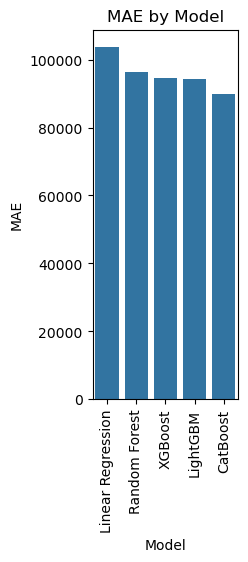

In [54]:
# График для MAE
plt.subplot(1, 3, 1)
sns.barplot(x='Model', y='MAE', data=results_df)
plt.title('MAE by Model')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Linear Regression'),
  Text(1, 0, 'Random Forest'),
  Text(2, 0, 'XGBoost'),
  Text(3, 0, 'LightGBM'),
  Text(4, 0, 'CatBoost')])

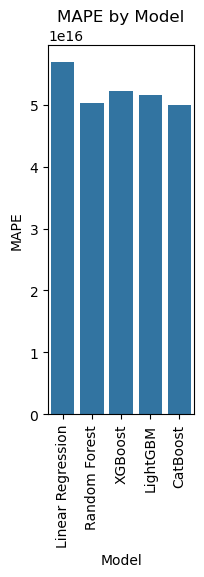

In [55]:
# График для MAPE
plt.subplot(1, 3, 3)
sns.barplot(x='Model', y='MAPE', data=results_df)
plt.title('MAPE by Model')
plt.xticks(rotation=90)

In [1]:
# График для RMSE
plt.subplot(1, 3, 3)
sns.barplot(x='Model', y='RMSE', data=results_df)
plt.title('RMSE by Model')
plt.xticks(rotation=90)

NameError: name 'plt' is not defined

In [56]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [57]:
# Создаем словарь с предсказаниями
predictions_dict = {
    'Linear Regression': y_pred_linear,
    'Random Forest': y_pred_rf,
    'XGBoost': y_pred_xgb,
    'LightGBM': y_pred_lgbm,
    'CatBoost': y_pred_catboost
}

# Находим лучшую модель по RMSE
best_model_name = results_df.loc[results_df['RMSE'].idxmin(), 'Model']
best_predictions = predictions_dict[best_model_name]

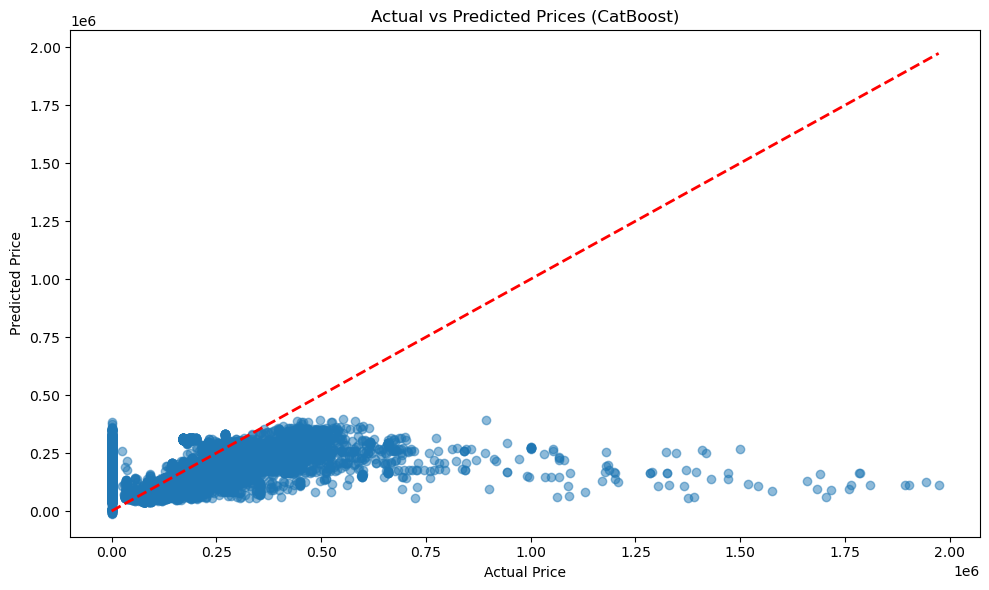

In [58]:
# Создаем scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'Actual vs Predicted Prices ({best_model_name})')
plt.tight_layout()
plt.show()

In [59]:
# Анализ важности признаков для лучшей модели
if best_model_name == 'Random Forest':
    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': rf_model.feature_importances_
    })
elif best_model_name == 'XGBoost':
    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': xgb_model.feature_importances_
    })
elif best_model_name == 'LightGBM':
    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': lgbm_model.feature_importances_
    })
elif best_model_name == 'CatBoost':
    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': catboost_model.feature_importances_
    })
else:
    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': np.zeros(len(X_train.columns))
    })

feature_importance = feature_importance.sort_values('importance', ascending=False)
print(f"\nTop 10 most important features for {best_model_name}:")
print(feature_importance.head(10))


Top 10 most important features for CatBoost:
                        feature  importance
0                          year      16.320
1428              region_Москва      16.231
1455                  okrug_ЦАО       6.644
1109          developer_Абсолют       3.332
1589            corpus_корпус 1       2.125
339   project_Коллекция Лужники       2.108
3644                    ID_6310       1.521
1184         developer_Донстрой       1.462
1032    developer_Capital Group       1.397
1                        months       1.349


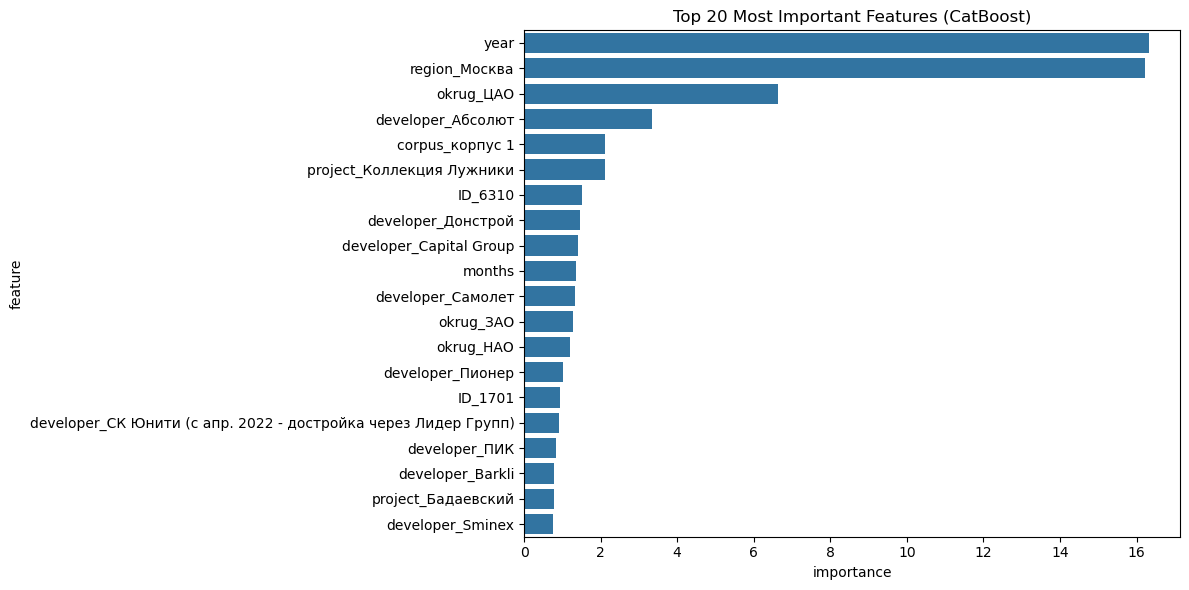

In [60]:
# Визуализация важности признаков
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
plt.title(f'Top 20 Most Important Features ({best_model_name})')
plt.tight_layout()
plt.show()

In [61]:
# Сохранение результатов
results_df.to_csv('model_results.csv', index=False)
feature_importance.to_csv('feature_importance.csv', index=False)

print("\nOptimization results:")
print("Random Forest best params:", study_rf.best_params)
print("XGBoost best params:", study_xgb.best_params)
print("LightGBM best params:", study_lgbm.best_params)
print("CatBoost best params:", study_catboost.best_params)

# Сохранение лучшей модели
import joblib
if best_model_name == 'Random Forest':
    joblib.dump(rf_model, 'best_model.pkl')
elif best_model_name == 'XGBoost':
    joblib.dump(xgb_model, 'best_model.pkl')
elif best_model_name == 'LightGBM':
    joblib.dump(lgbm_model, 'best_model.pkl')
elif best_model_name == 'CatBoost':
    joblib.dump(catboost_model, 'best_model.pkl')


Optimization results:
Random Forest best params: {'n_estimators': 199, 'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'bootstrap': True}
XGBoost best params: {'n_estimators': 147, 'max_depth': 4, 'learning_rate': 0.012525876452018008, 'subsample': 0.9346544597393691, 'colsample_bytree': 0.92298681568898, 'gamma': 0.6301919104405982, 'min_child_weight': 1}
LightGBM best params: {'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.02913885799372625, 'num_leaves': 34}
CatBoost best params: {'iterations': 178, 'depth': 10, 'learning_rate': 0.12031572971645957, 'l2_leaf_reg': 7.136546398214599, 'random_strength': 0.8478021333209719, 'bagging_temperature': 0.9879475642037205}
